In [ ]:
from google.colab import files

files.download("data/X_scaled.csv")
files.download("data/y.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

# نفس المسار اللي عرفناه
project_path = "/content/drive/MyDrive/HeartProject"
data_path = os.path.join(project_path, "data")

# Load data
X_scaled_df = pd.read_csv(os.path.join(data_path, "X_scaled.csv"))
y = pd.read_csv(os.path.join(data_path, "y.csv")).squeeze()

print("✅ Data loaded successfully from Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully from Google Drive!


# STEP 1 — Data Loading & Preprocessing
We load the Cleveland dataset, handle missing values, convert categorical features to numeric,
and transform the target column into a binary label:
- 0 = No Disease
- 1 = Disease


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease.csv to heart_disease (1).csv


In [ ]:
import pandas as pd
import numpy as np

# read file
df = pd.read_csv("/content/heart_disease.csv", header=None)

# Replace '?' with NaN
df = df.replace('?', np.nan)

# show first 5 colm
print(df.head())
print(df.shape)
print(df.info())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9    

In [ ]:
import pandas as pd
import numpy as np

# Define column names from UCI documentation
cols = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach",
        "exang","oldpeak","slope","ca","thal","num"]

# Load Cleveland dataset
df = pd.read_csv("/content/heart_disease.csv", header=None, names=cols, na_values='?')

print("Shape of dataset:", df.shape)
print("First 5 rows:")
df.head()


Shape of dataset: (303, 14)
First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Step 1.2: Check Missing Values

In this step, we analyze the dataset to check for missing values.  
The UCI Cleveland dataset contains some `NaN` values (originally represented as `?`) in specific columns like **ca** and **thal**.  
We need to detect them now so we can handle them properly in the preprocessing phase.


In [ ]:
# Check missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Show dataset info
print("\nDataset Info:")
print(df.info())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13),

# Step 1.2.1: Impute Missing Values

We handle missing values in the raw dataset before applying One-Hot Encoding.  
Columns `ca` and `thal` may contain NaN values.  
We will fill them using the most frequent value (mode).


In [ ]:
# Impute missing values with mode (before encoding)
for col in ["ca", "thal"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Double-check
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-1128258455.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Step 1.3: Encoding Categorical Features

The dataset contains several categorical features (e.g., `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`).  
Machine learning models require numerical inputs, so we need to encode categorical columns.  

We will use:
- **One-Hot Encoding** for multi-class categorical features (e.g., `cp`, `thal`, `slope`, `restecg`).
- **Label Encoding** (or keep as-is) for binary features (e.g., `sex`, `fbs`, `exang`).  

This transformation creates new columns for each category, making the dataset fully numeric and ready for scaling.


In [ ]:
import pandas as pd

# Categorical columns
categorical_cols = ["cp", "thal", "slope", "restecg"]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("First 5 rows:")
df_encoded.head()


Shape after encoding: (303, 19)
First 5 rows:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,cp_2.0,cp_3.0,cp_4.0,thal_6.0,thal_7.0,slope_2.0,slope_3.0,restecg_1.0,restecg_2.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,False,False,False,True,False,False,True,False,True
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,False,False,True,False,False,True,False,False,True
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,False,False,True,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,False,True,False,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,True,False,False,False,False,False,False,False,True


/tmp/ipython-input-711512345.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




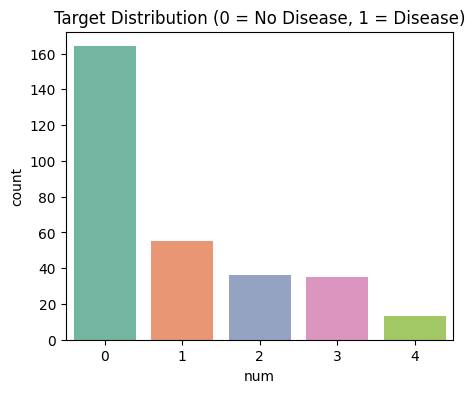

/tmp/ipython-input-711512345.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-711512345.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-711512345.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-711512345.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




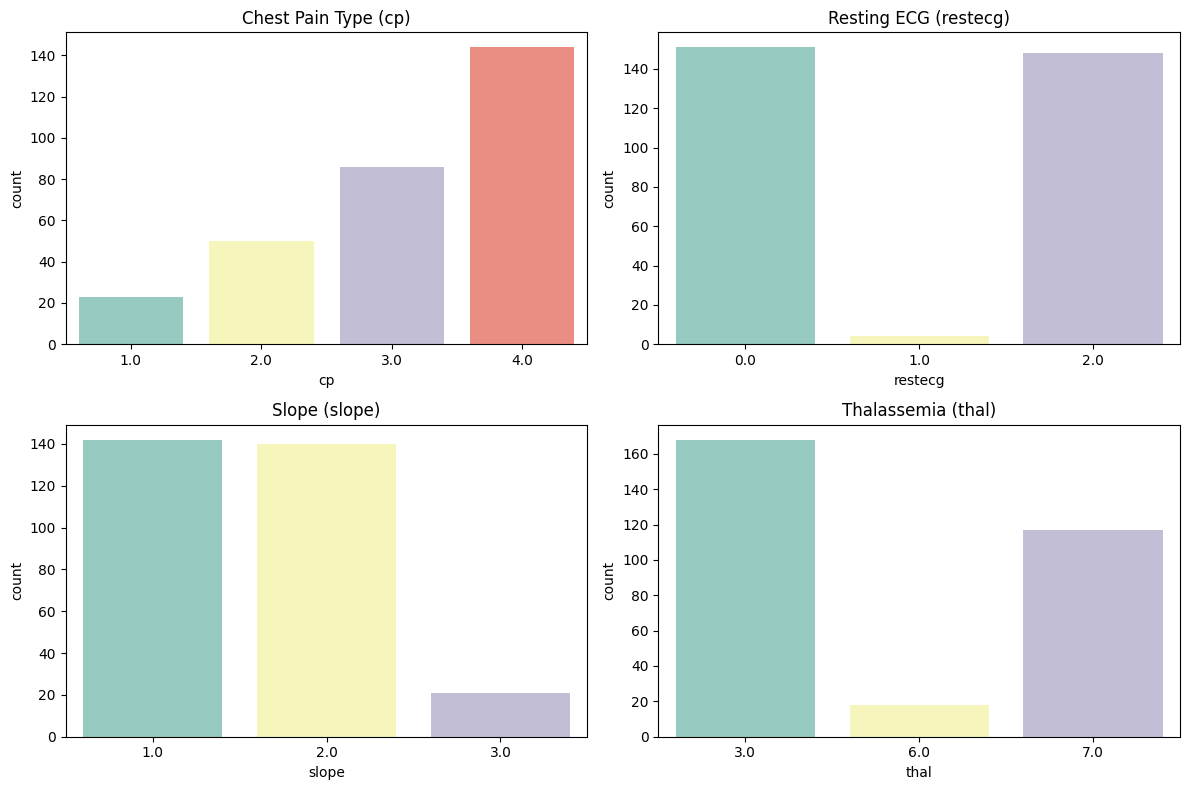

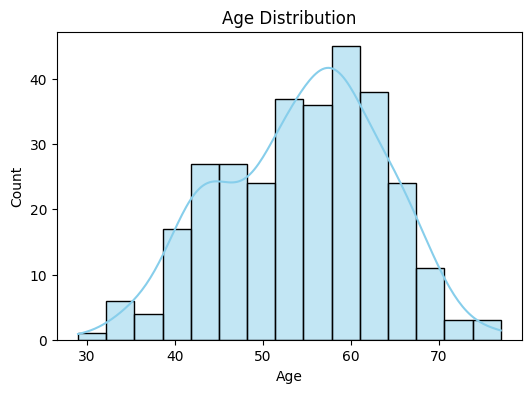

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x="num", data=df_encoded, palette="Set2") # Changed "target" to "num"
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

# 2. Plot categorical columns distributions
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.countplot(ax=axes[0,0], x="cp", data=df, palette="Set3")
axes[0,0].set_title("Chest Pain Type (cp)")

sns.countplot(ax=axes[0,1], x="restecg", data=df, palette="Set3")
axes[0,1].set_title("Resting ECG (restecg)")

sns.countplot(ax=axes[1,0], x="slope", data=df, palette="Set3")
axes[1,0].set_title("Slope (slope)")

sns.countplot(ax=axes[1,1], x="thal", data=df, palette="Set3")
axes[1,1].set_title("Thalassemia (thal)")

plt.tight_layout()
plt.show()

# 3. Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Step 1.4: Feature Scaling

Since features in the dataset have different ranges (e.g., `age` vs `chol` vs `oldpeak`),  
we need to standardize them to ensure fair contribution to the models.  

We will use **StandardScaler** from scikit-learn, which transforms features to have:
- Mean = 0  
- Standard Deviation = 1  

The target column (`num`) will be excluded from scaling.


To better understand relationships between features and identify redundancy, we perform correlation analysis using both:

- **Pearson Correlation**: Measures linear correlation between features.
- **Spearman Correlation**: Measures monotonic correlation (more robust to non-linear relationships).

We also perform **Boxplots** (interactive) to detect potential outliers across all numeric features.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop("num", axis=1)
y = df_encoded["num"]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Shape after scaling:", X_scaled_df.shape)
X_scaled_df.head()


Shape after scaling: (303, 18)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,thal_6.0,thal_7.0,slope_2.0,slope_3.0,restecg_1.0,restecg_2.0
0,0.948726,0.686202,0.757525,-0.264900,2.394438,0.017197,-0.696631,1.087338,-0.711131,-0.444554,-0.629534,-0.951662,3.979112,-0.793116,-0.926766,3.664502,-0.115663,1.023375
1,1.392002,0.686202,1.611220,0.760415,-0.417635,-1.821905,1.435481,0.397182,2.504881,-0.444554,-0.629534,1.050793,-0.251312,-0.793116,1.079021,-0.272888,-0.115663,1.023375
2,1.392002,0.686202,-0.665300,-0.342283,-0.417635,-0.902354,1.435481,1.346147,1.432877,-0.444554,-0.629534,1.050793,-0.251312,1.260850,1.079021,-0.272888,-0.115663,1.023375
3,-1.932564,0.686202,-0.096170,0.063974,-0.417635,1.637359,-0.696631,2.122573,-0.711131,-0.444554,1.588476,-0.951662,-0.251312,-0.793116,-0.926766,3.664502,-0.115663,-0.977158
4,-1.489288,-1.457296,-0.096170,-0.825922,-0.417635,0.980537,-0.696631,0.310912,-0.711131,2.249444,-0.629534,-0.951662,-0.251312,-0.793116,-0.926766,-0.272888,-0.115663,1.023375


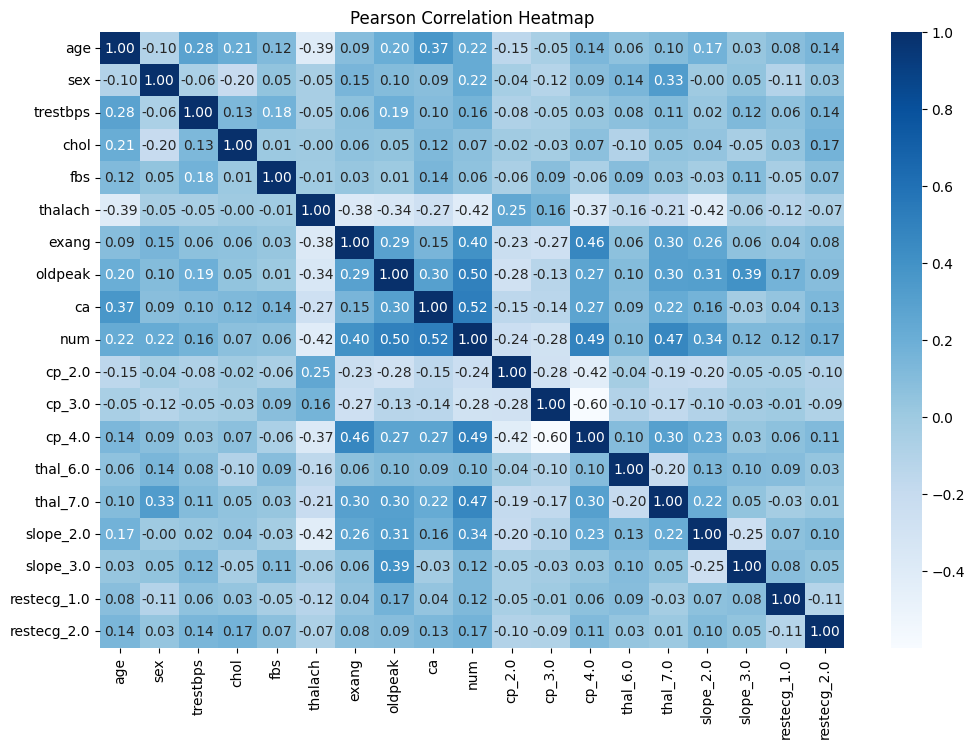

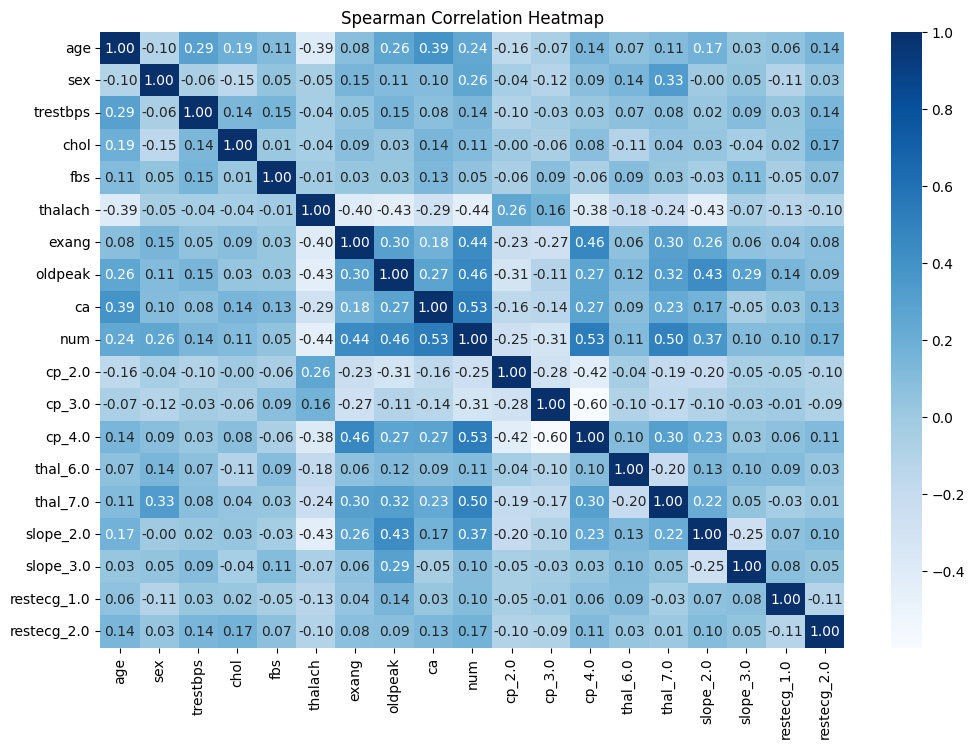

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pearson Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(method="pearson"), annot=True, cmap="Blues", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Spearman Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(method="spearman"), annot=True, cmap="Blues", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


In [ ]:
import plotly.express as px

# Loop through numeric features and create interactive boxplots
numeric_cols = df_encoded.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_cols:
    fig = px.box(df_encoded, y=col, points="all", title=f"Boxplot of {col} (with outliers)")
    fig.show()


# Step 1.5: Outlier Detection & Visualization

In this step, we visualize the dataset to:
- Detect possible **outliers** using boxplots.
- Understand the **distribution** of features using histograms.
- Explore **feature correlations** with a heatmap.  

These visualizations help us better understand the data and identify potential issues before training models.


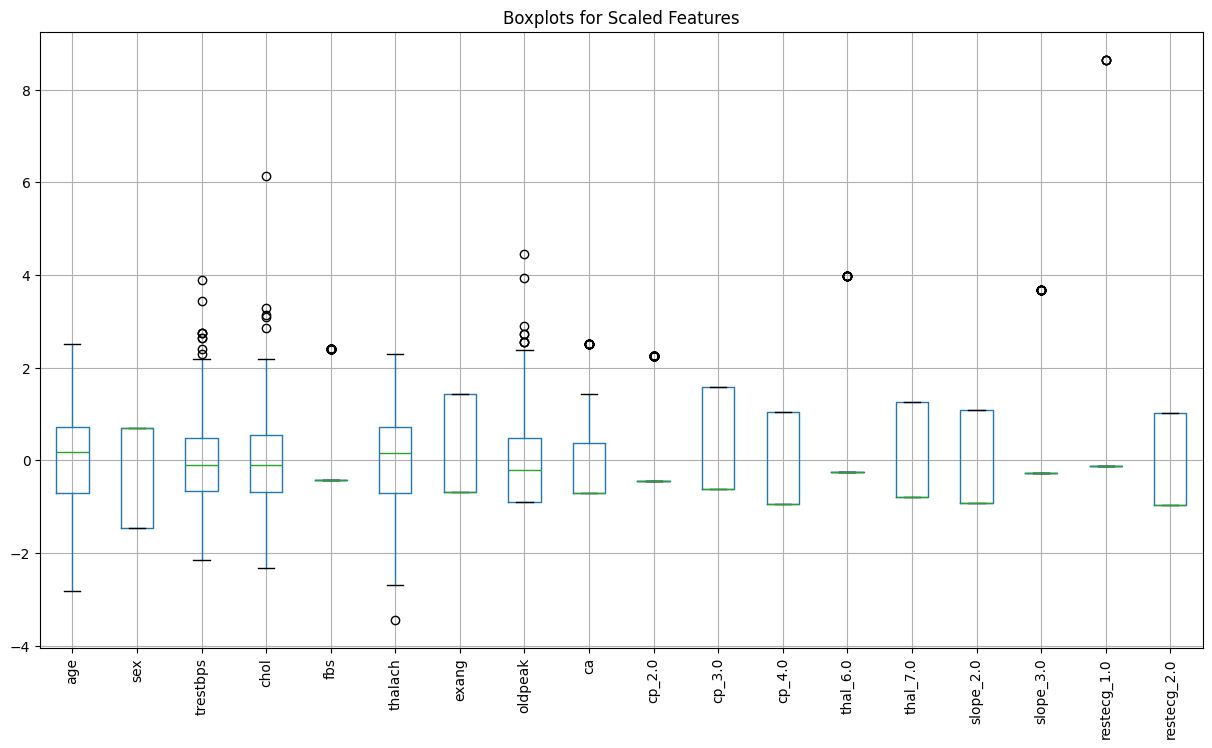

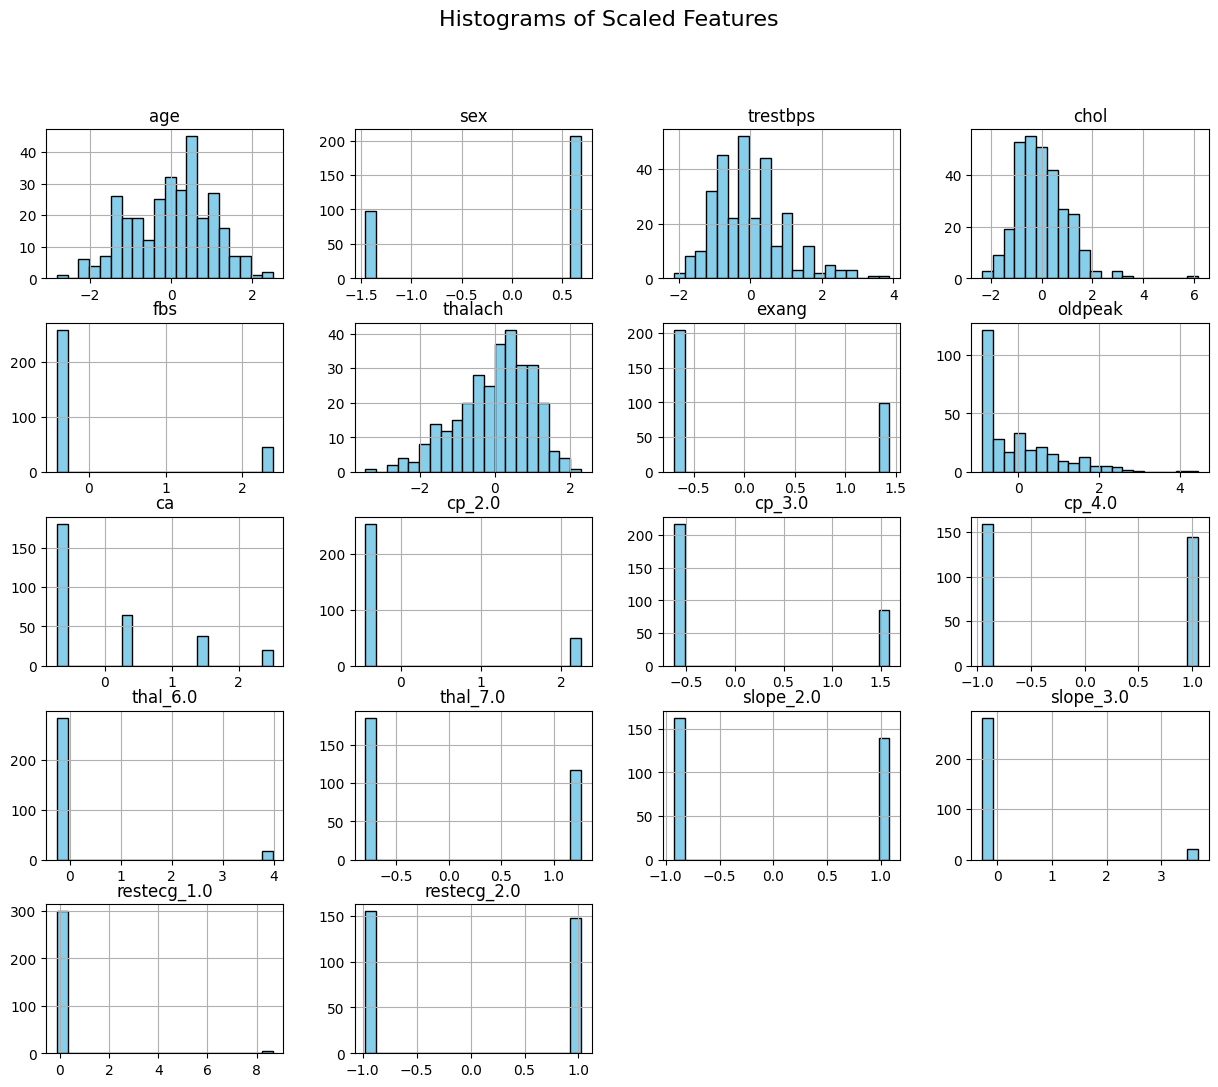

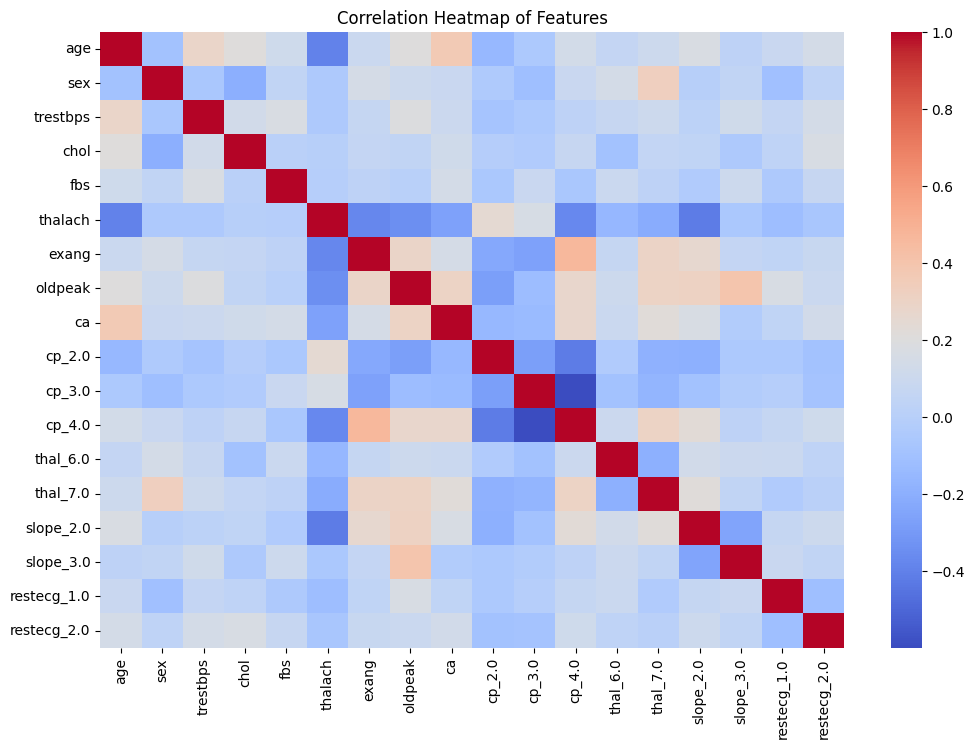

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Boxplots for scaled features
plt.figure(figsize=(15, 8))
X_scaled_df.boxplot(rot=90)
plt.title("Boxplots for Scaled Features")
plt.show()

# 2. Histograms for scaled features
X_scaled_df.hist(bins=20, figsize=(15, 12), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Scaled Features", fontsize=16)
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(12, 8))
corr = pd.DataFrame(X_scaled_df, columns=X.columns).corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()
